In [1]:
# -- Packages
import numpy as np
import pandas as pd 
import os
# -- Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
def read_file(file_name):
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(file_name)
    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    data['Price'] = data['Price'].str.replace(',', '').astype(float)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    data.sort_index(inplace=True)
    return data

In [40]:
def define_model(df, name, forcast_day, train_test_ratio=0.9):
    # Tạo các đặc trưng theo chu kỳ ngày tháng
    fourier = CalendarFourier(freq='M', order=4)
    dp = DeterministicProcess(index=df.index.to_period('D'),
                              constant=True,
                              order=1,
                              seasonal=False,
                              additional_terms=[fourier],
                              drop=True)
        # Tạo DataFrame đặc trưng
    X = dp.in_sample()

        # Lấy giá trị mục tiêu
    y = df['Price']

        # Chia dữ liệu thành tập huấn luyện và kiểm tra
    train_size = int(len(X) * train_test_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

        # Huấn luyện mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)

        # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

        # Đánh giá mô hình
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print(f'Testing RMSE:{test_rmse}')
    print(f'Testing MAE: {mae}')
    print(f'Testing MAPE: {mape}')
        # Tạo các đặc trưng cho 30 ngày tiếp theo
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forcast_day, freq='D')
    X_future = dp.out_of_sample(steps=forcast_day)
        # Dự đoán 30 ngày tiếp theo
    y_future_pred = model.predict(X_future)
        # Hiển thị dự đoán
    future_predictions = pd.DataFrame({'Date': future_dates, 'Predicted_Price': y_future_pred})
    print(future_predictions)
        # Vẽ biểu đồ kết quả
    plt.figure(figsize=(14, 7))
    plt.plot(y_train.index, y_train, label='Train Prices')
    plt.plot(y_test.index, y_test, label='Test Prices')
    plt.plot(X_test.index, y_pred, label='Predicted Prices')
    plt.plot(future_predictions['Date'], future_predictions['Predicted_Price'], label=f'Predictions {forcast_day}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{name} prediction')
    plt.legend()
    plt.show()

<font size = '24'>BID</font>

In [41]:
# Đọc dữ liệu từ tệp CSV
df = read_file('../Dataset/BID Historical Data.csv')

# Kiểm tra thông tin về dữ liệu
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1555 entries, 2018-01-02 to 2024-03-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1555 non-null   float64
 1   Open      1555 non-null   object 
 2   High      1555 non-null   object 
 3   Low       1555 non-null   object 
 4   Vol.      1555 non-null   object 
 5   Change %  1555 non-null   object 
dtypes: float64(1), object(5)
memory usage: 85.0+ KB


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,20664.3,"19,516.3","20,664.3","19,286.7",3.65M,5.88%
2018-01-03,20511.2,"20,664.3","20,702.5","20,281.6",3.09M,-0.74%
2018-01-04,21085.2,"20,511.2","21,200.0","20,319.9",5.56M,2.80%
2018-01-05,20970.4,"21,046.9","21,085.2","20,626.0",2.40M,-0.54%
2018-01-08,21314.8,"21,200.0","21,582.7","20,970.4",2.58M,1.64%


BID 9:1

Testing RMSE:4166.635320181946
Testing MAE: 3446.628179185276
Testing MAPE: 0.07291299749673111
         Date  Predicted_Price
0  2024-03-28     44780.838313
1  2024-03-29     44810.208742
2  2024-03-30     44853.184931
3  2024-03-31     44920.801983
4  2024-04-01     45014.391032
5  2024-04-02     45124.910737
6  2024-04-03     45227.021135
7  2024-04-04     45299.727564
8  2024-04-05     45335.182455
9  2024-04-06     45341.579252
10 2024-04-07     45336.319487
11 2024-04-08     45334.326460
12 2024-04-09     45339.468897
13 2024-04-10     45344.720470
14 2024-04-11     45340.527085
15 2024-04-12     45325.076300
16 2024-04-13     45308.720389
17 2024-04-14     45308.747633
18 2024-04-15     45337.432823
19 2024-04-16     45391.291692
20 2024-04-17     45449.257659
21 2024-04-18     45482.050131
22 2024-04-19     45467.771750
23 2024-04-20     45404.481710
24 2024-04-21     45312.027451
25 2024-04-22     45221.899383
26 2024-04-23     45161.197542
27 2024-04-24     45140.288733
28 20

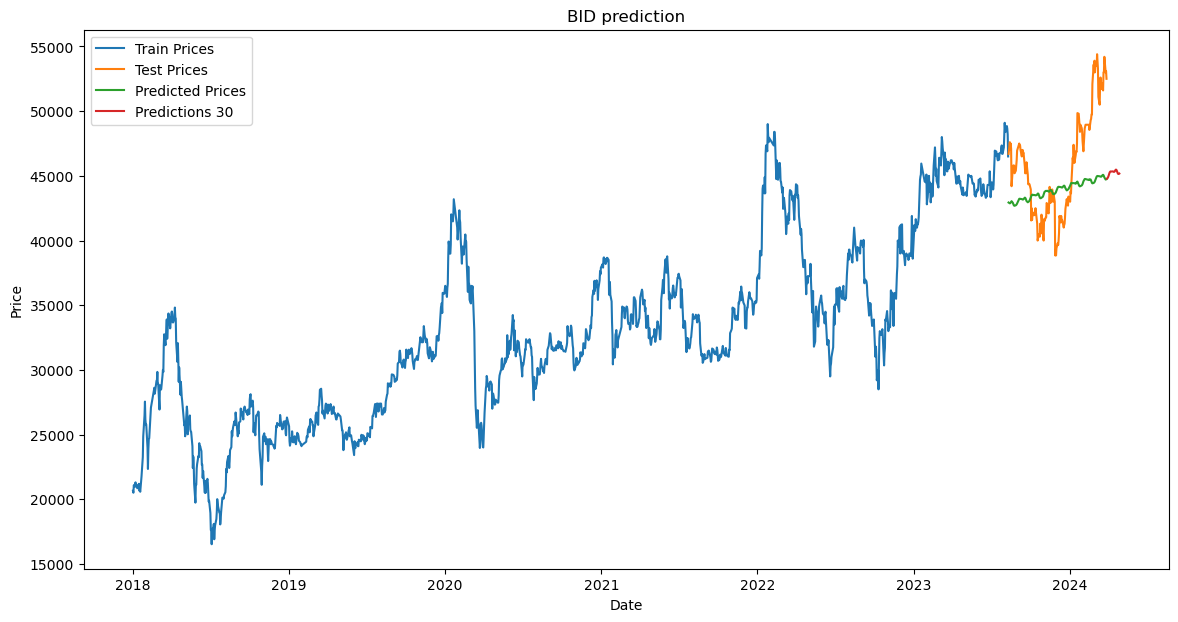

In [42]:
define_model(df,'BID',30,0.9)

Testing RMSE:4166.635320181946
Testing MAE: 3446.628179185276
Testing MAPE: 0.07291299749673111
         Date  Predicted_Price
0  2024-03-28     44780.838313
1  2024-03-29     44810.208742
2  2024-03-30     44853.184931
3  2024-03-31     44920.801983
4  2024-04-01     45014.391032
5  2024-04-02     45124.910737
6  2024-04-03     45227.021135
7  2024-04-04     45299.727564
8  2024-04-05     45335.182455
9  2024-04-06     45341.579252
10 2024-04-07     45336.319487
11 2024-04-08     45334.326460
12 2024-04-09     45339.468897
13 2024-04-10     45344.720470
14 2024-04-11     45340.527085
15 2024-04-12     45325.076300
16 2024-04-13     45308.720389
17 2024-04-14     45308.747633
18 2024-04-15     45337.432823
19 2024-04-16     45391.291692
20 2024-04-17     45449.257659
21 2024-04-18     45482.050131
22 2024-04-19     45467.771750
23 2024-04-20     45404.481710
24 2024-04-21     45312.027451
25 2024-04-22     45221.899383
26 2024-04-23     45161.197542
27 2024-04-24     45140.288733
28 20

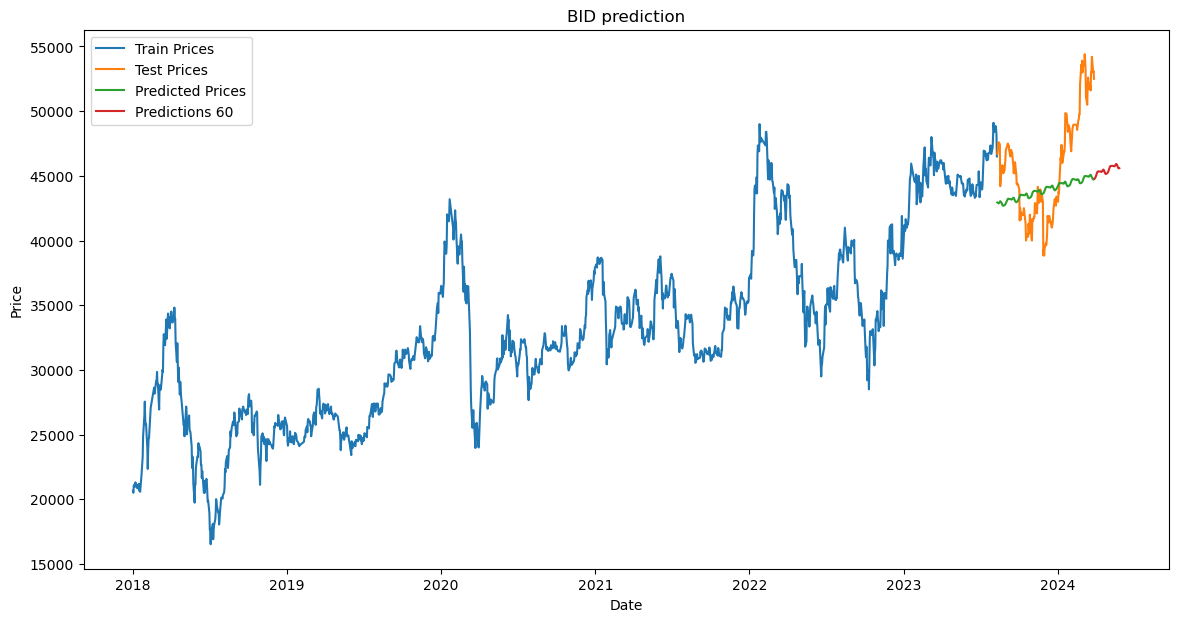

In [43]:
define_model(df,'BID',60,0.9)

Testing RMSE:4166.635320181946
Testing MAE: 3446.628179185276
Testing MAPE: 0.07291299749673111
         Date  Predicted_Price
0  2024-03-28     44780.838313
1  2024-03-29     44810.208742
2  2024-03-30     44853.184931
3  2024-03-31     44920.801983
4  2024-04-01     45014.391032
..        ...              ...
85 2024-06-21     46175.988004
86 2024-06-22     46085.859936
87 2024-06-23     46025.158095
88 2024-06-24     46004.249286
89 2024-06-25     46015.140634

[90 rows x 2 columns]


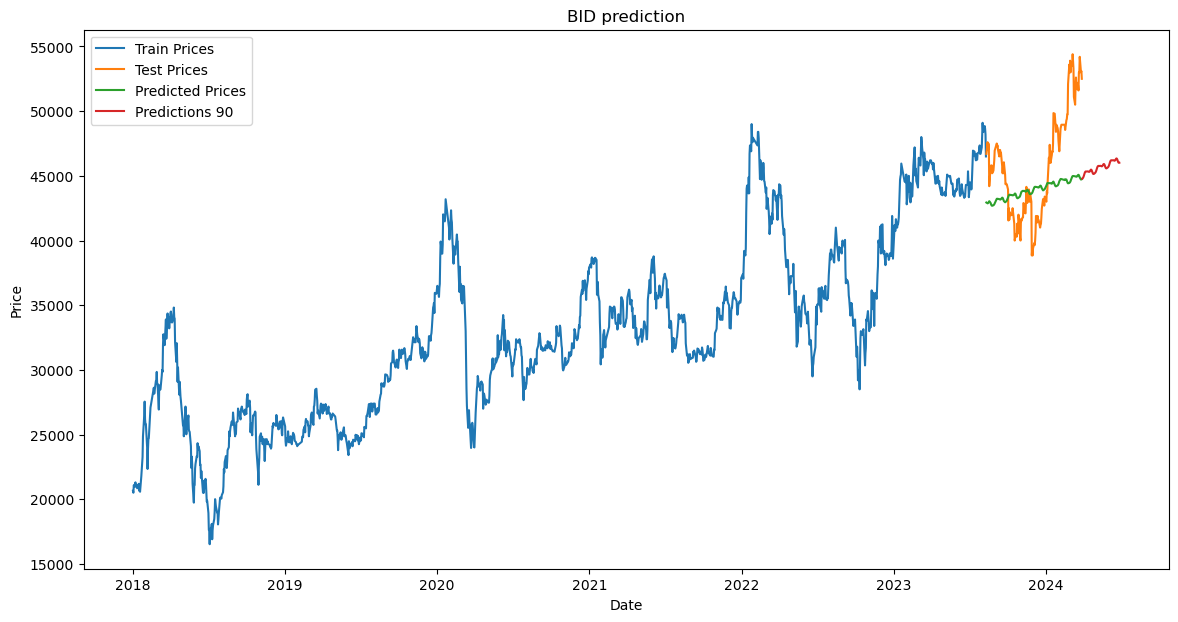

In [44]:
define_model(df,'BID',90,0.9)

BID 8:2

Testing RMSE:5321.400718397397
Testing MAE: 4594.19892102596
Testing MAPE: 0.09831548432049066
         Date  Predicted_Price
0  2024-03-28     42489.784751
1  2024-03-29     42492.241561
2  2024-03-30     42488.047006
3  2024-03-31     42506.132592
4  2024-04-01     42570.313151
5  2024-04-02     42685.402097
6  2024-04-03     42821.451472
7  2024-04-04     42933.669276
8  2024-04-05     42987.324393
9  2024-04-06     42977.950686
10 2024-04-07     42933.061478
11 2024-04-08     42894.401434
12 2024-04-09     42892.312306
13 2024-04-10     42928.698692
14 2024-04-11     42979.174262
15 2024-04-12     43012.210287
16 2024-04-13     43011.958675
17 2024-04-14     42989.236607
18 2024-04-15     42973.326460
19 2024-04-16     42990.279688
20 2024-04-17     43042.613300
21 2024-04-18     43104.508330
22 2024-04-19     43136.355352
23 2024-04-20     43109.550259
24 2024-04-21     43025.431958
25 2024-04-22     42915.868997
26 2024-04-23     42824.905319
27 2024-04-24     42783.226923
28 202

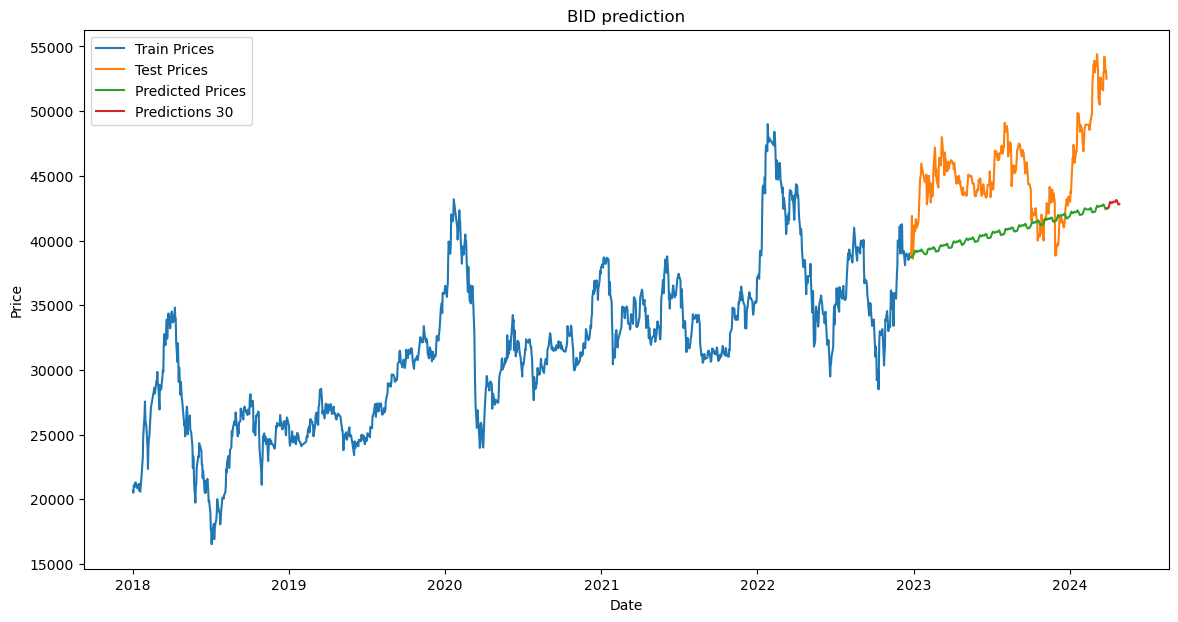

In [45]:
define_model(df,'BID',30,0.8)

Testing RMSE:5321.400718397397
Testing MAE: 4594.19892102596
Testing MAPE: 0.09831548432049066
         Date  Predicted_Price
0  2024-03-28     42489.784751
1  2024-03-29     42492.241561
2  2024-03-30     42488.047006
3  2024-03-31     42506.132592
4  2024-04-01     42570.313151
5  2024-04-02     42685.402097
6  2024-04-03     42821.451472
7  2024-04-04     42933.669276
8  2024-04-05     42987.324393
9  2024-04-06     42977.950686
10 2024-04-07     42933.061478
11 2024-04-08     42894.401434
12 2024-04-09     42892.312306
13 2024-04-10     42928.698692
14 2024-04-11     42979.174262
15 2024-04-12     43012.210287
16 2024-04-13     43011.958675
17 2024-04-14     42989.236607
18 2024-04-15     42973.326460
19 2024-04-16     42990.279688
20 2024-04-17     43042.613300
21 2024-04-18     43104.508330
22 2024-04-19     43136.355352
23 2024-04-20     43109.550259
24 2024-04-21     43025.431958
25 2024-04-22     42915.868997
26 2024-04-23     42824.905319
27 2024-04-24     42783.226923
28 202

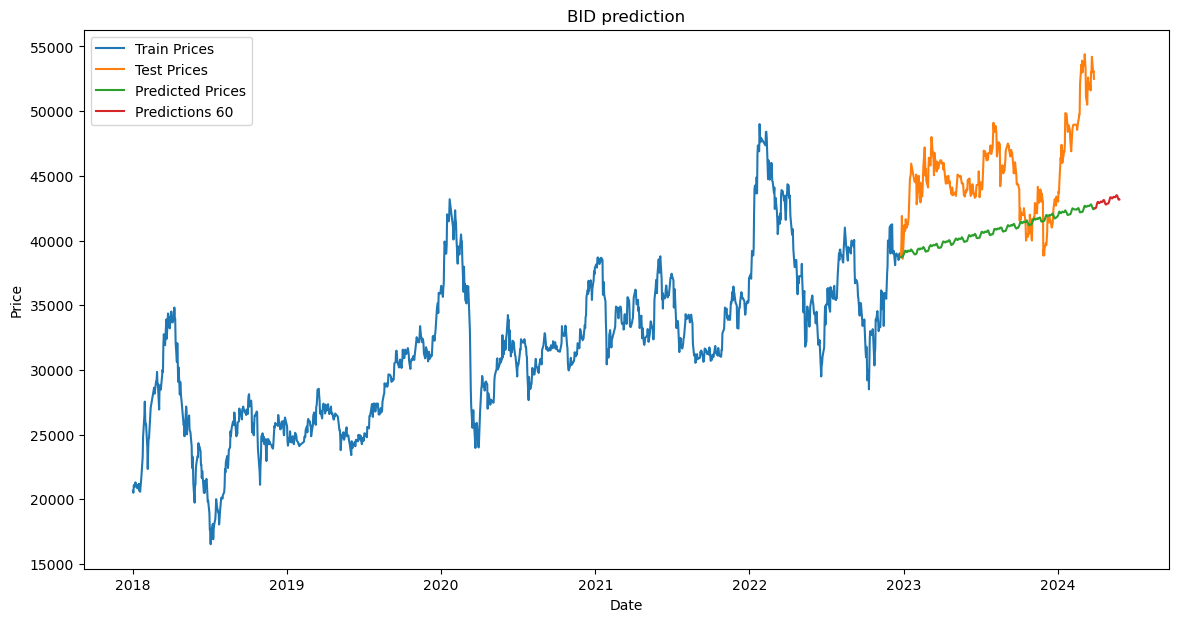

In [46]:
define_model(df,'BID',60,0.8)

Testing RMSE:5321.400718397397
Testing MAE: 4594.19892102596
Testing MAPE: 0.09831548432049066
         Date  Predicted_Price
0  2024-03-28     42489.784751
1  2024-03-29     42492.241561
2  2024-03-30     42488.047006
3  2024-03-31     42506.132592
4  2024-04-01     42570.313151
..        ...              ...
85 2024-06-21     43761.983472
86 2024-06-22     43652.420511
87 2024-06-23     43561.456833
88 2024-06-24     43519.778437
89 2024-06-25     43528.405742

[90 rows x 2 columns]


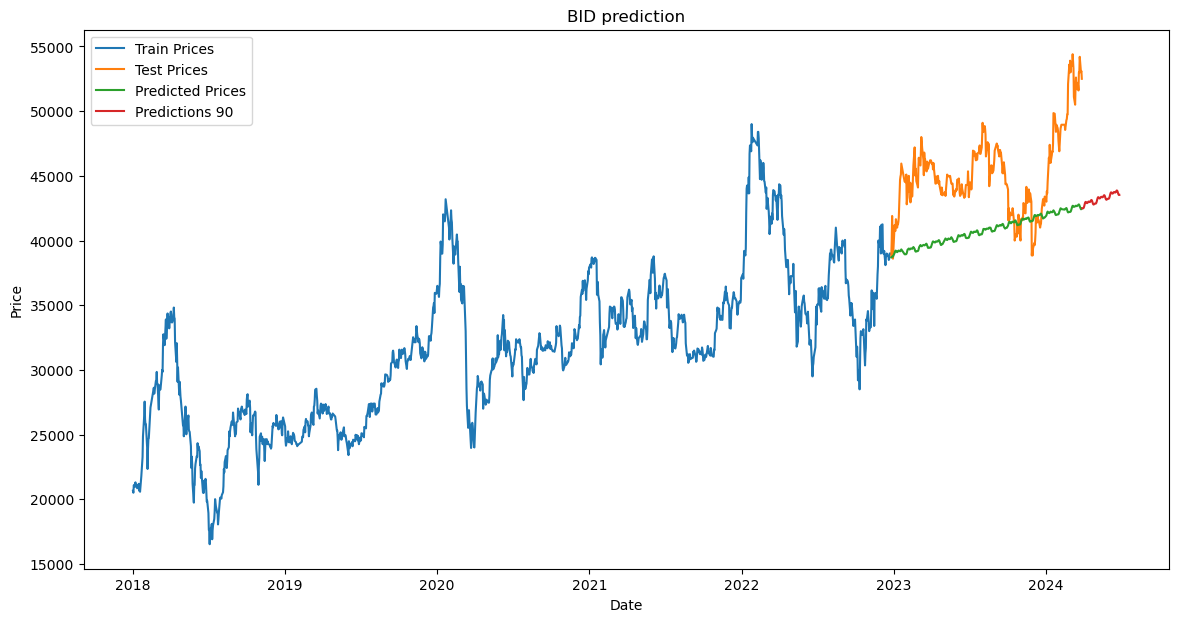

In [47]:
define_model(df,'BID',90,0.8)


BID 7:3

Testing RMSE:4169.233608164551
Testing MAE: 3500.55715091555
Testing MAPE: 0.08648713732832207
         Date  Predicted_Price
0  2024-03-28     44835.635464
1  2024-03-29     44807.149220
2  2024-03-30     44782.476951
3  2024-03-31     44801.640466
4  2024-04-01     44893.462546
5  2024-04-02     45057.758777
6  2024-04-03     45245.134775
7  2024-04-04     45389.375896
8  2024-04-05     45444.360811
9  2024-04-06     45411.556818
10 2024-04-07     45338.738561
11 2024-04-08     45290.205361
12 2024-04-09     45307.257468
13 2024-04-10     45384.116058
14 2024-04-11     45474.518224
15 2024-04-12     45524.313632
16 2024-04-13     45508.523411
17 2024-04-14     45448.525392
18 2024-04-15     45398.125117
19 2024-04-16     45407.671738
20 2024-04-17     45489.727343
21 2024-04-18     45608.744735
22 2024-04-19     45701.522573
23 2024-04-20     45715.232325
24 2024-04-21     45638.627755
25 2024-04-22     45506.864462
26 2024-04-23     45377.819964
27 2024-04-24     45296.287538
28 202

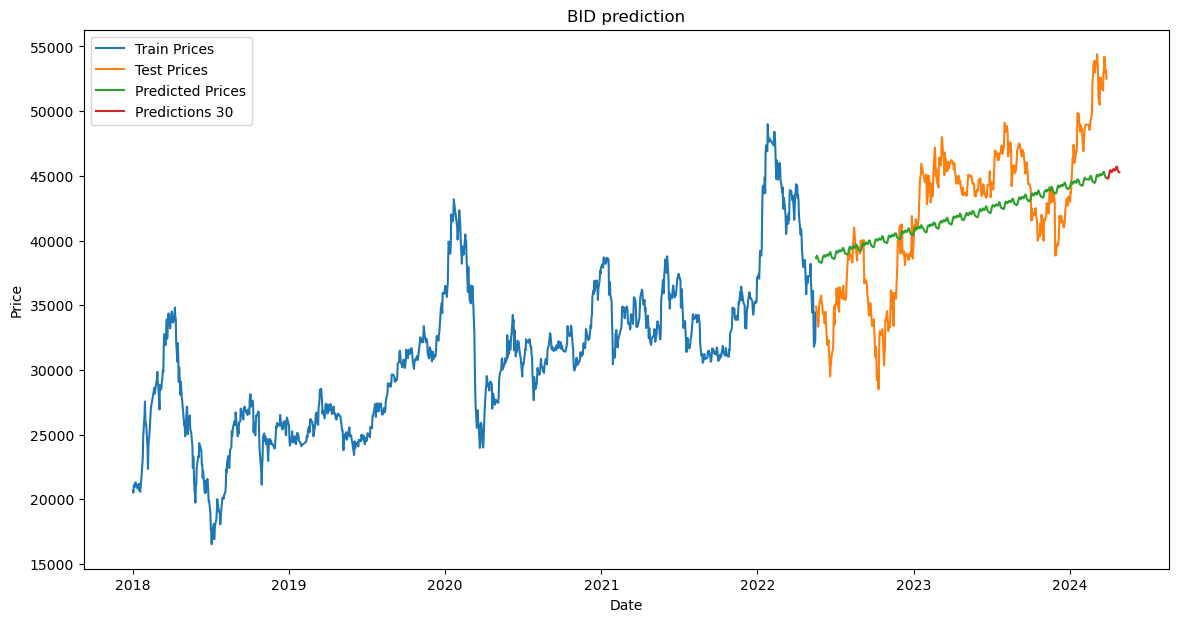

In [48]:
define_model(df,'BID',30,0.7)

Testing RMSE:4169.233608164551
Testing MAE: 3500.55715091555
Testing MAPE: 0.08648713732832207
         Date  Predicted_Price
0  2024-03-28     44835.635464
1  2024-03-29     44807.149220
2  2024-03-30     44782.476951
3  2024-03-31     44801.640466
4  2024-04-01     44893.462546
5  2024-04-02     45057.758777
6  2024-04-03     45245.134775
7  2024-04-04     45389.375896
8  2024-04-05     45444.360811
9  2024-04-06     45411.556818
10 2024-04-07     45338.738561
11 2024-04-08     45290.205361
12 2024-04-09     45307.257468
13 2024-04-10     45384.116058
14 2024-04-11     45474.518224
15 2024-04-12     45524.313632
16 2024-04-13     45508.523411
17 2024-04-14     45448.525392
18 2024-04-15     45398.125117
19 2024-04-16     45407.671738
20 2024-04-17     45489.727343
21 2024-04-18     45608.744735
22 2024-04-19     45701.522573
23 2024-04-20     45715.232325
24 2024-04-21     45638.627755
25 2024-04-22     45506.864462
26 2024-04-23     45377.819964
27 2024-04-24     45296.287538
28 202

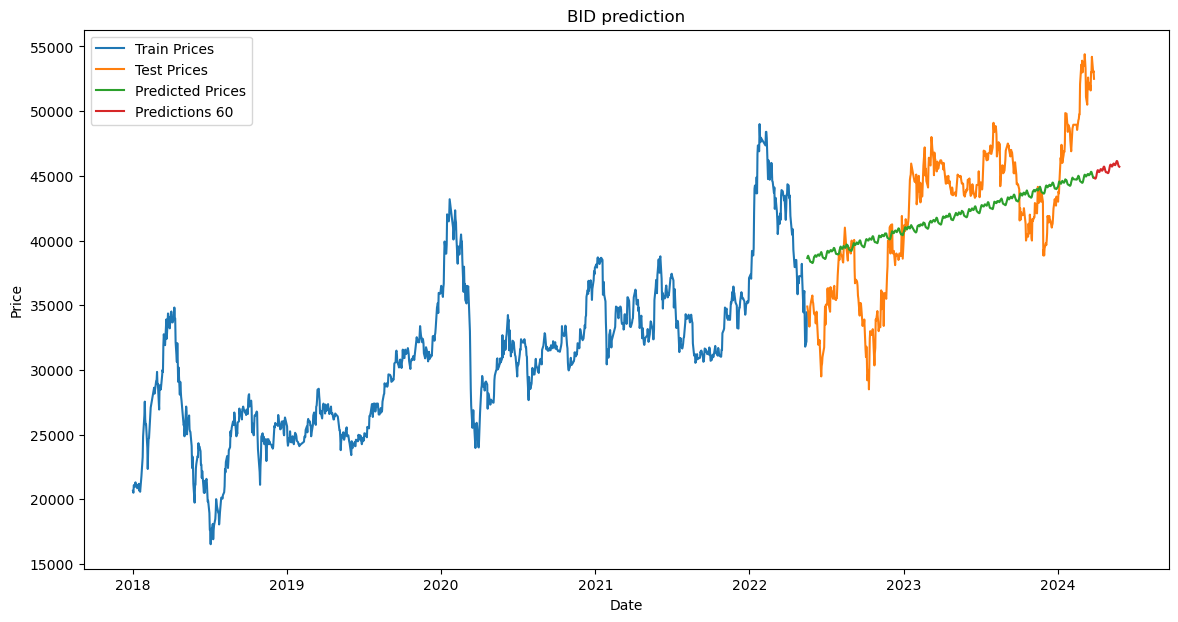

In [49]:
define_model(df,'BID',60,0.7)

Testing RMSE:4169.233608164551
Testing MAE: 3500.55715091555
Testing MAPE: 0.08648713732832207
         Date  Predicted_Price
0  2024-03-28     44835.635464
1  2024-03-29     44807.149220
2  2024-03-30     44782.476951
3  2024-03-31     44801.640466
4  2024-04-01     44893.462546
..        ...              ...
85 2024-06-21     46501.316173
86 2024-06-22     46369.552880
87 2024-06-23     46240.508382
88 2024-06-24     46158.975956
89 2024-06-25     46132.441788

[90 rows x 2 columns]


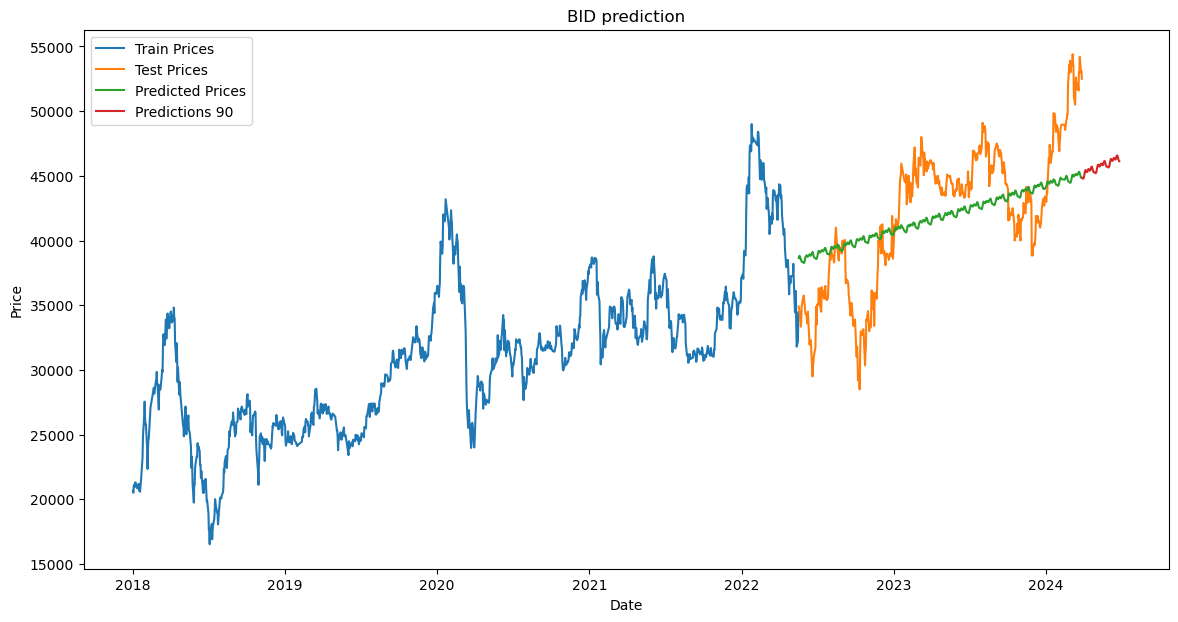

In [50]:
define_model(df,'BID',90,0.7)

<font size = '24'>MBB</font>

In [51]:
# Đọc dữ liệu từ tệp CSV
df = read_file('../Dataset/MBB Historical Data.csv')

# Kiểm tra thông tin về dữ liệu
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1555 entries, 2018-01-02 to 2024-03-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1555 non-null   float64
 1   Open      1555 non-null   object 
 2   High      1555 non-null   object 
 3   Low       1555 non-null   object 
 4   Vol.      1555 non-null   object 
 5   Change %  1555 non-null   object 
dtypes: float64(1), object(5)
memory usage: 85.0+ KB


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,10696.2,"10,273.2","10,696.2","10,212.7",19.00M,4.53%
2018-01-03,10595.5,"10,716.3","10,817.0","10,555.2",18.30M,-0.94%
2018-01-04,10615.6,"10,655.9","10,696.2","10,535.0",15.69M,0.19%
2018-01-05,10535.0,"10,635.7","10,655.9","10,454.5",23.65M,-0.76%
2018-01-08,11058.8,"10,514.9","11,058.8","10,494.7",22.19M,4.97%


MBB 9:1

Testing RMSE:4112.281681918874
Testing MAE: 3620.68333294592
Testing MAPE: 0.19488176857886905
         Date  Predicted_Price
0  2024-03-28     24245.680701
1  2024-03-29     24327.995687
2  2024-03-30     24408.842173
3  2024-03-31     24441.188143
4  2024-04-01     24406.340453
5  2024-04-02     24324.887921
6  2024-04-03     24256.047629
7  2024-04-04     24254.494037
8  2024-04-05     24334.125013
9  2024-04-06     24457.074450
10 2024-04-07     24556.256435
11 2024-04-08     24577.397769
12 2024-04-09     24513.511801
13 2024-04-10     24409.392621
14 2024-04-11     24333.053731
15 2024-04-12     24332.487512
16 2024-04-13     24405.641706
17 2024-04-14     24502.860980
18 2024-04-15     24559.897109
19 2024-04-16     24539.798327
20 2024-04-17     24456.464779
21 2024-04-18     24364.913619
22 2024-04-19     24325.171427
23 2024-04-20     24363.789302
24 2024-04-21     24458.106872
25 2024-04-22     24553.008497
26 2024-04-23     24598.338361
27 2024-04-24     24581.693113
28 202

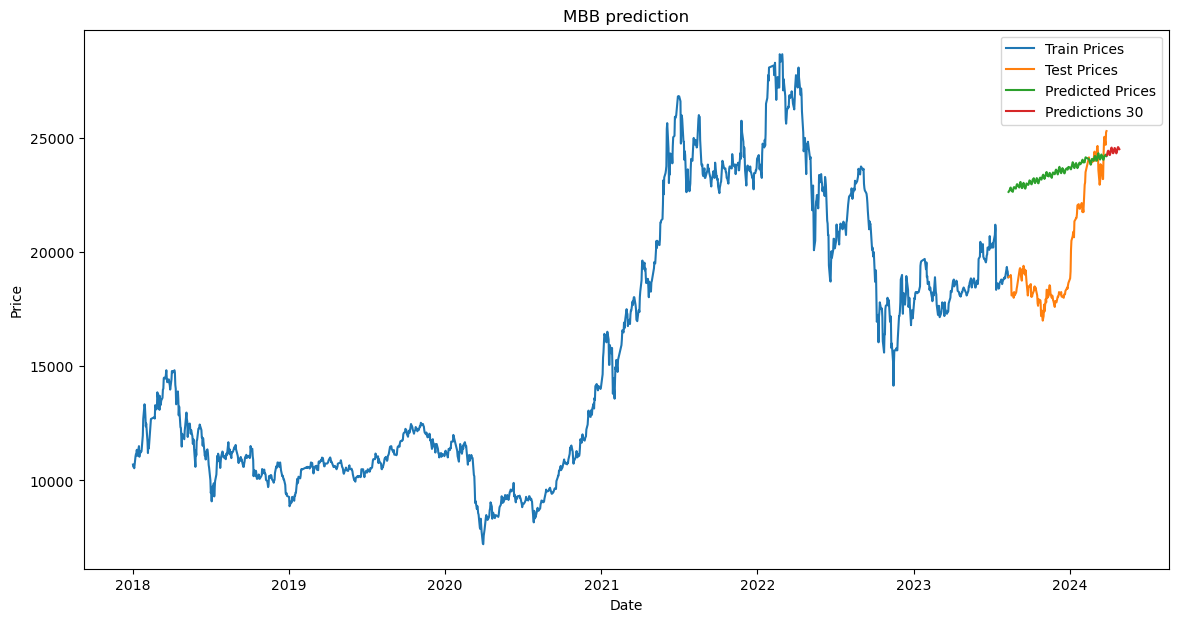

In [52]:
define_model(df,'MBB',30,0.9)

Testing RMSE:4112.281681918874
Testing MAE: 3620.68333294592
Testing MAPE: 0.19488176857886905
         Date  Predicted_Price
0  2024-03-28     24245.680701
1  2024-03-29     24327.995687
2  2024-03-30     24408.842173
3  2024-03-31     24441.188143
4  2024-04-01     24406.340453
5  2024-04-02     24324.887921
6  2024-04-03     24256.047629
7  2024-04-04     24254.494037
8  2024-04-05     24334.125013
9  2024-04-06     24457.074450
10 2024-04-07     24556.256435
11 2024-04-08     24577.397769
12 2024-04-09     24513.511801
13 2024-04-10     24409.392621
14 2024-04-11     24333.053731
15 2024-04-12     24332.487512
16 2024-04-13     24405.641706
17 2024-04-14     24502.860980
18 2024-04-15     24559.897109
19 2024-04-16     24539.798327
20 2024-04-17     24456.464779
21 2024-04-18     24364.913619
22 2024-04-19     24325.171427
23 2024-04-20     24363.789302
24 2024-04-21     24458.106872
25 2024-04-22     24553.008497
26 2024-04-23     24598.338361
27 2024-04-24     24581.693113
28 202

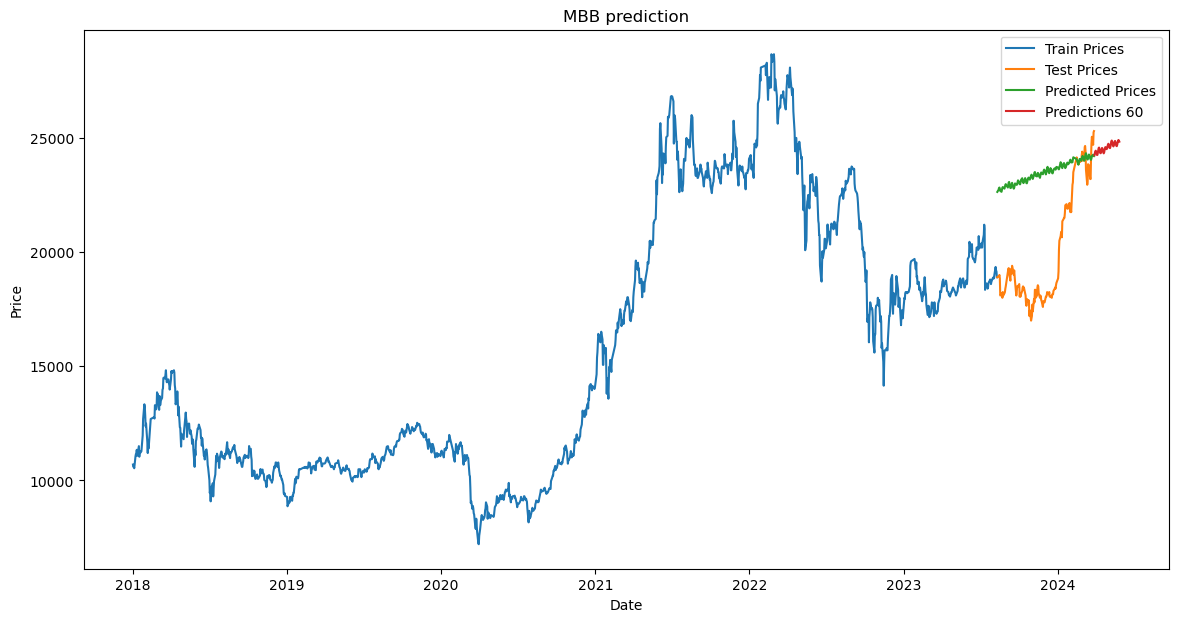

In [53]:
define_model(df,'MBB',60,0.9)

Testing RMSE:4112.281681918874
Testing MAE: 3620.68333294592
Testing MAPE: 0.19488176857886905
         Date  Predicted_Price
0  2024-03-28     24245.680701
1  2024-03-29     24327.995687
2  2024-03-30     24408.842173
3  2024-03-31     24441.188143
4  2024-04-01     24406.340453
..        ...              ...
85 2024-06-21     25074.442967
86 2024-06-22     25169.344591
87 2024-06-23     25214.674456
88 2024-06-24     25198.029208
89 2024-06-25     25151.154087

[90 rows x 2 columns]


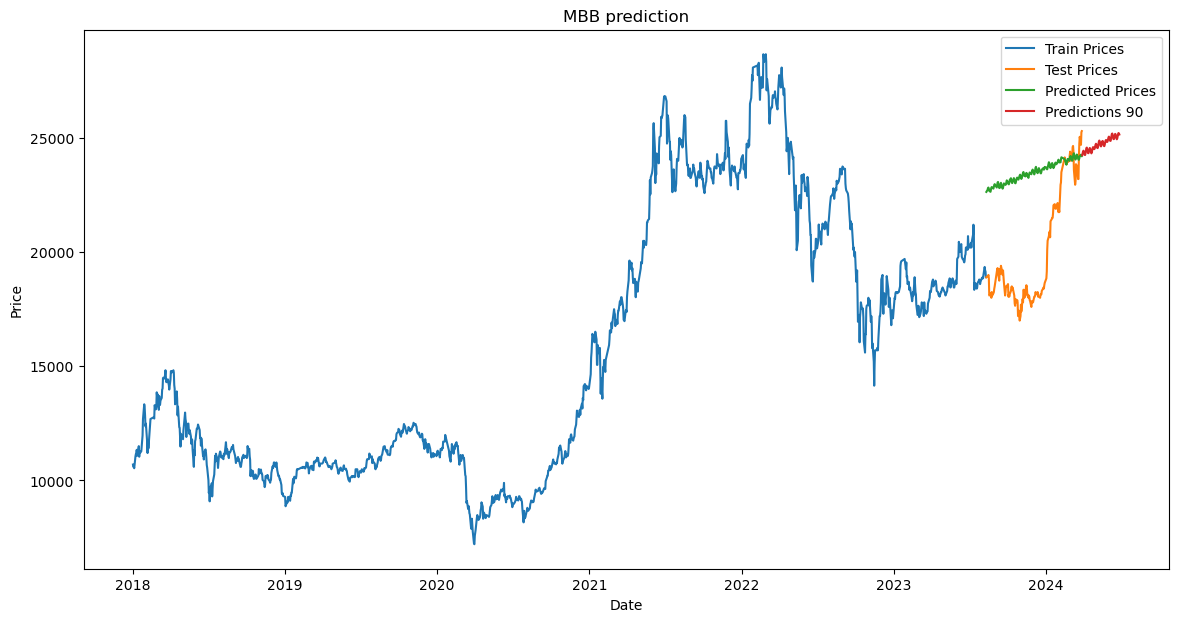

In [54]:
define_model(df,'MBB',90,0.9)

MBB 8:2


Testing RMSE:5733.245157082367
Testing MAE: 5517.209056609452
Testing MAPE: 0.2942550671636655
         Date  Predicted_Price
0  2024-03-28     26759.153651
1  2024-03-29     26846.017545
2  2024-03-30     26930.338200
3  2024-03-31     26968.469893
4  2024-04-01     26939.681890
5  2024-04-02     26859.353774
6  2024-04-03     26782.840389
7  2024-04-04     26766.850058
8  2024-04-05     26832.593205
9  2024-04-06     26950.065497
10 2024-04-07     27054.894338
11 2024-04-08     27087.847094
12 2024-04-09     27032.035205
13 2024-04-10     26923.863578
14 2024-04-11     26830.412770
15 2024-04-12     26807.488322
16 2024-04-13     26865.029639
17 2024-04-14     26961.821015
18 2024-04-15     27032.574424
19 2024-04-16     27029.729269
20 2024-04-17     26953.162810
21 2024-04-18     26849.234734
22 2024-04-19     26780.647837
23 2024-04-20     26787.298850
24 2024-04-21     26863.485404
25 2024-04-22     26965.394351
26 2024-04-23     27042.547650
27 2024-04-24     27071.328647
28 202

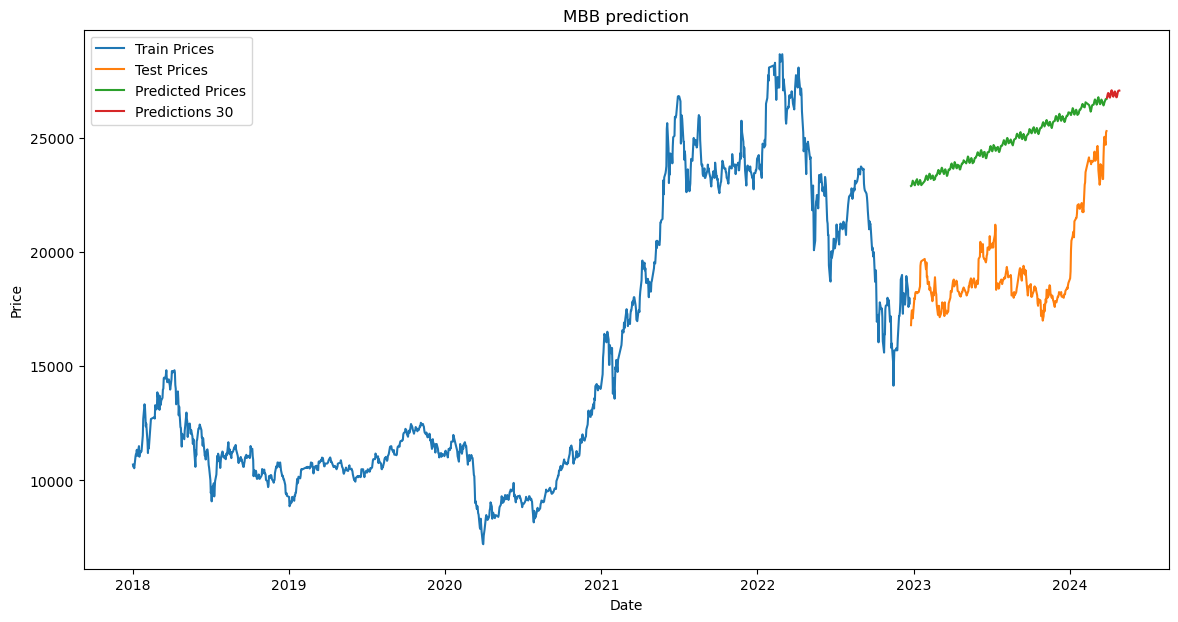

In [55]:
define_model(df,'MBB',30,0.8)

Testing RMSE:5733.245157082367
Testing MAE: 5517.209056609452
Testing MAPE: 0.2942550671636655
         Date  Predicted_Price
0  2024-03-28     26759.153651
1  2024-03-29     26846.017545
2  2024-03-30     26930.338200
3  2024-03-31     26968.469893
4  2024-04-01     26939.681890
5  2024-04-02     26859.353774
6  2024-04-03     26782.840389
7  2024-04-04     26766.850058
8  2024-04-05     26832.593205
9  2024-04-06     26950.065497
10 2024-04-07     27054.894338
11 2024-04-08     27087.847094
12 2024-04-09     27032.035205
13 2024-04-10     26923.863578
14 2024-04-11     26830.412770
15 2024-04-12     26807.488322
16 2024-04-13     26865.029639
17 2024-04-14     26961.821015
18 2024-04-15     27032.574424
19 2024-04-16     27029.729269
20 2024-04-17     26953.162810
21 2024-04-18     26849.234734
22 2024-04-19     26780.647837
23 2024-04-20     26787.298850
24 2024-04-21     26863.485404
25 2024-04-22     26965.394351
26 2024-04-23     27042.547650
27 2024-04-24     27071.328647
28 202

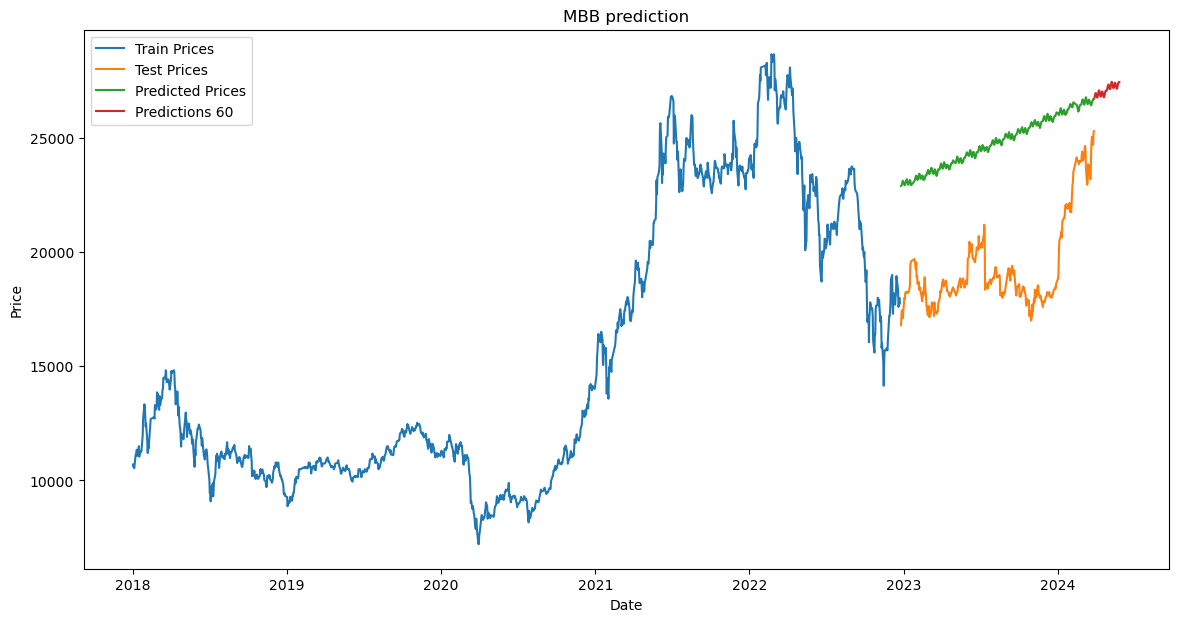

In [56]:
define_model(df,'MBB',60,0.8)

Testing RMSE:5733.245157082367
Testing MAE: 5517.209056609452
Testing MAPE: 0.2942550671636655
         Date  Predicted_Price
0  2024-03-28     26759.153651
1  2024-03-29     26846.017545
2  2024-03-30     26930.338200
3  2024-03-31     26968.469893
4  2024-04-01     26939.681890
..        ...              ...
85 2024-06-21     27614.034067
86 2024-06-22     27715.943014
87 2024-06-23     27793.096313
88 2024-06-24     27821.877310
89 2024-06-25     27818.606209

[90 rows x 2 columns]


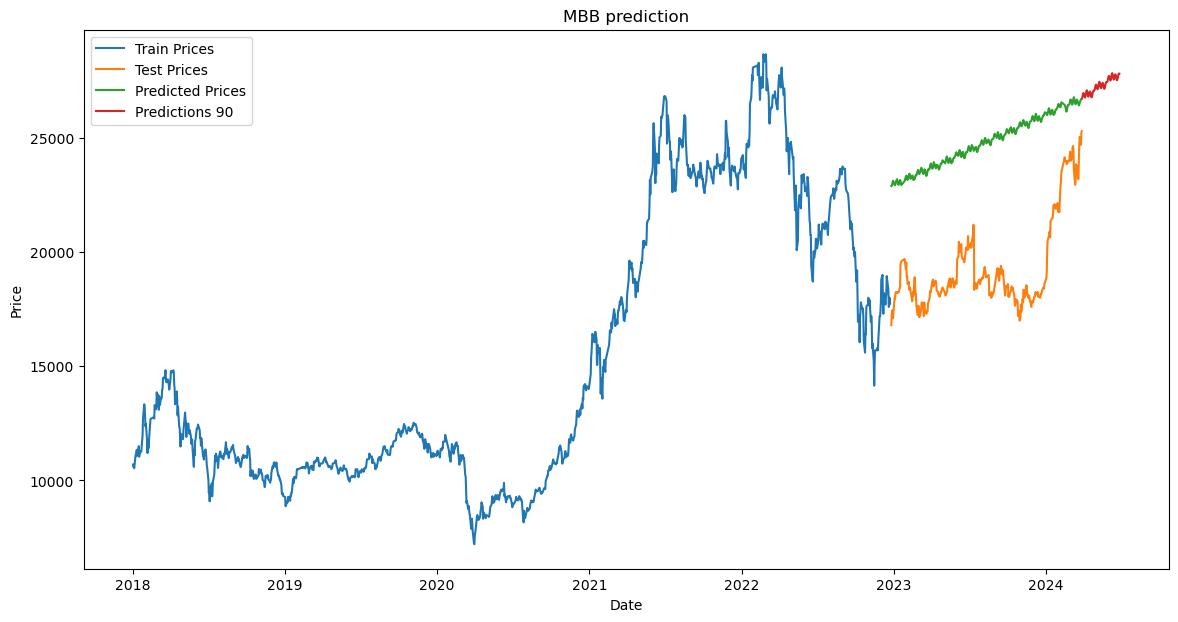

In [57]:
define_model(df,'MBB',90,0.8)

MBB 7:3

Testing RMSE:6703.390997987317
Testing MAE: 6091.891658779749
Testing MAPE: 0.32665070658358963
         Date  Predicted_Price
0  2024-03-28     28836.064569
1  2024-03-29     28965.965477
2  2024-03-30     29097.594800
3  2024-03-31     29164.114838
4  2024-04-01     29135.600570
5  2024-04-02     29034.175401
6  2024-04-03     28933.994212
7  2024-04-04     28908.408255
8  2024-04-05     28982.557749
9  2024-04-06     29117.395703
10 2024-04-07     29235.336262
11 2024-04-08     29270.684110
12 2024-04-09     29211.819881
13 2024-04-10     29107.657602
14 2024-04-11     29034.467783
15 2024-04-12     29045.207165
16 2024-04-13     29134.851629
17 2024-04-14     29244.462594
18 2024-04-15     29301.015337
19 2024-04-16     29266.404382
20 2024-04-17     29163.108344
21 2024-04-18     29059.602238
22 2024-04-19     29025.347870
23 2024-04-20     29085.326544
24 2024-04-21     29204.275247
25 2024-04-22     29310.960823
26 2024-04-23     29346.170472
27 2024-04-24     29302.325632
28 20

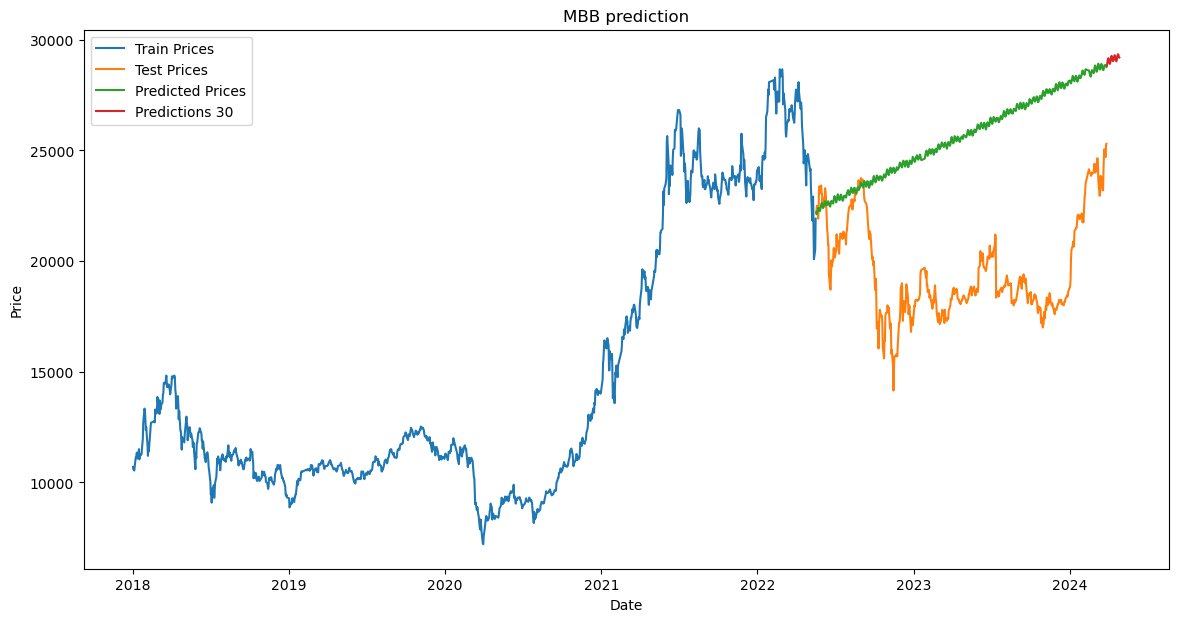

In [58]:
define_model(df,'MBB',30,0.7)

Testing RMSE:6703.390997987317
Testing MAE: 6091.891658779749
Testing MAPE: 0.32665070658358963
         Date  Predicted_Price
0  2024-03-28     28836.064569
1  2024-03-29     28965.965477
2  2024-03-30     29097.594800
3  2024-03-31     29164.114838
4  2024-04-01     29135.600570
5  2024-04-02     29034.175401
6  2024-04-03     28933.994212
7  2024-04-04     28908.408255
8  2024-04-05     28982.557749
9  2024-04-06     29117.395703
10 2024-04-07     29235.336262
11 2024-04-08     29270.684110
12 2024-04-09     29211.819881
13 2024-04-10     29107.657602
14 2024-04-11     29034.467783
15 2024-04-12     29045.207165
16 2024-04-13     29134.851629
17 2024-04-14     29244.462594
18 2024-04-15     29301.015337
19 2024-04-16     29266.404382
20 2024-04-17     29163.108344
21 2024-04-18     29059.602238
22 2024-04-19     29025.347870
23 2024-04-20     29085.326544
24 2024-04-21     29204.275247
25 2024-04-22     29310.960823
26 2024-04-23     29346.170472
27 2024-04-24     29302.325632
28 20

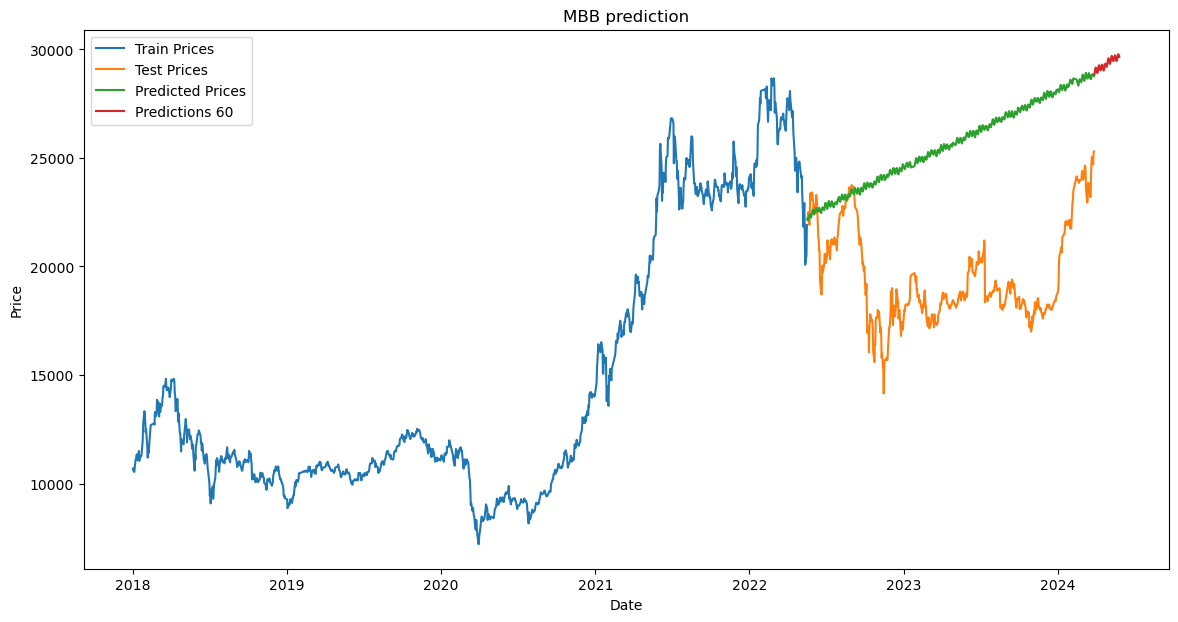

In [59]:
define_model(df,'MBB',60,0.7)

Testing RMSE:6703.390997987317
Testing MAE: 6091.891658779749
Testing MAPE: 0.32665070658358963
         Date  Predicted_Price
0  2024-03-28     28836.064569
1  2024-03-29     28965.965477
2  2024-03-30     29097.594800
3  2024-03-31     29164.114838
4  2024-04-01     29135.600570
..        ...              ...
85 2024-06-21     30069.760519
86 2024-06-22     30176.446095
87 2024-06-23     30211.655745
88 2024-06-24     30167.810905
89 2024-06-25     30093.706945

[90 rows x 2 columns]


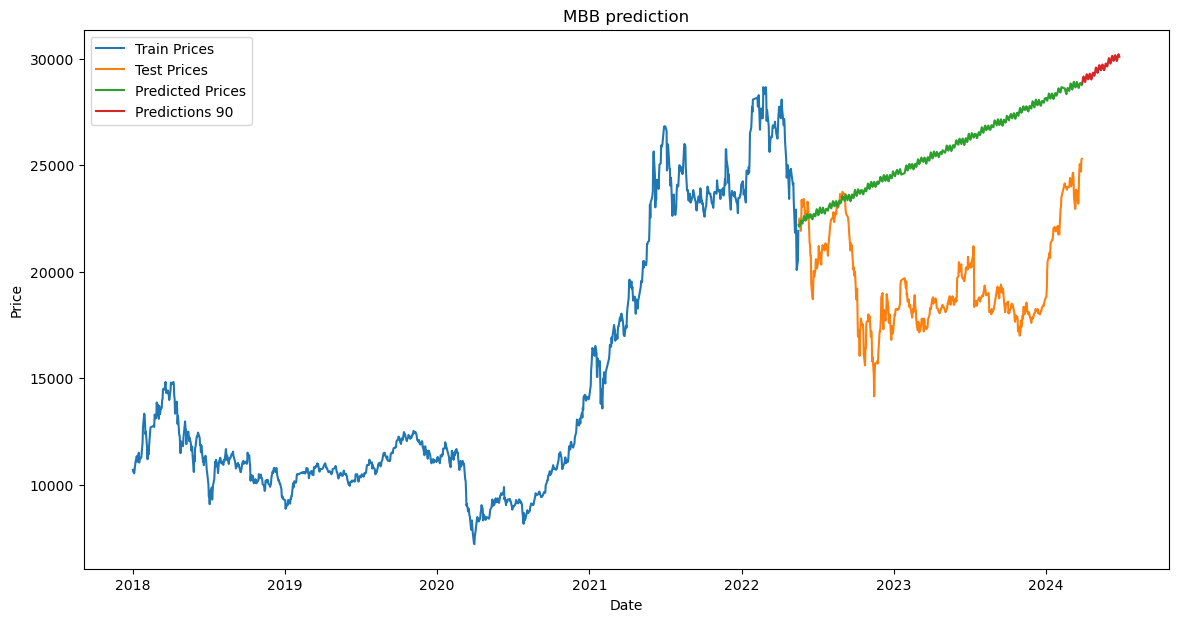

In [60]:
define_model(df,'MBB',90,0.7)

<font size = '24'>VCB</font>

In [61]:
# Đọc dữ liệu từ tệp CSV
df = read_file('../Dataset/VCB Historical Data.csv')

# Kiểm tra thông tin về dữ liệu
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1555 entries, 2018-01-02 to 2024-03-27
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1555 non-null   float64
 1   Open      1555 non-null   object 
 2   High      1555 non-null   object 
 3   Low       1555 non-null   object 
 4   Vol.      1555 non-null   object 
 5   Change %  1555 non-null   object 
dtypes: float64(1), object(5)
memory usage: 85.0+ KB


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,41700.0,"40,942","42,003","40,638",3.57M,1.29%
2018-01-03,41624.0,"42,079","42,230","41,321",2.35M,-0.18%
2018-01-04,42003.0,"41,396","42,003","41,169",2.54M,0.91%
2018-01-05,40942.0,"41,776","41,776","40,866",2.61M,-2.53%
2018-01-08,42003.0,"40,942","42,079","40,183",2.64M,2.59%


VCB 9:1



Testing RMSE:7883.085715065895
Testing MAE: 7144.16650712545
Testing MAPE: 0.08243037033641422
         Date  Predicted_Price
0  2024-03-28     98050.359925
1  2024-03-29     98211.267220
2  2024-03-30     98391.439350
3  2024-03-31     98556.320991
4  2024-04-01     98681.614704
5  2024-04-02     98765.253748
6  2024-04-03     98822.613137
7  2024-04-04     98880.774343
8  2024-04-05     98955.073587
9  2024-04-06     99037.249650
10 2024-04-07     99099.322196
11 2024-04-08     99111.188134
12 2024-04-09     99061.128065
13 2024-04-10     98966.346212
14 2024-04-11     98866.688457
15 2024-04-12     98804.997578
16 2024-04-13     98805.661766
17 2024-04-14     98863.753954
18 2024-04-15     98950.385377
19 2024-04-16     99029.976671
20 2024-04-17     99078.416829
21 2024-04-18     99091.614696
22 2024-04-19     99081.008696
23 2024-04-20     99061.257117
24 2024-04-21     99039.822483
25 2024-04-22     99015.726801
26 2024-04-23     98987.383462
27 2024-04-24     98962.403527
28 202

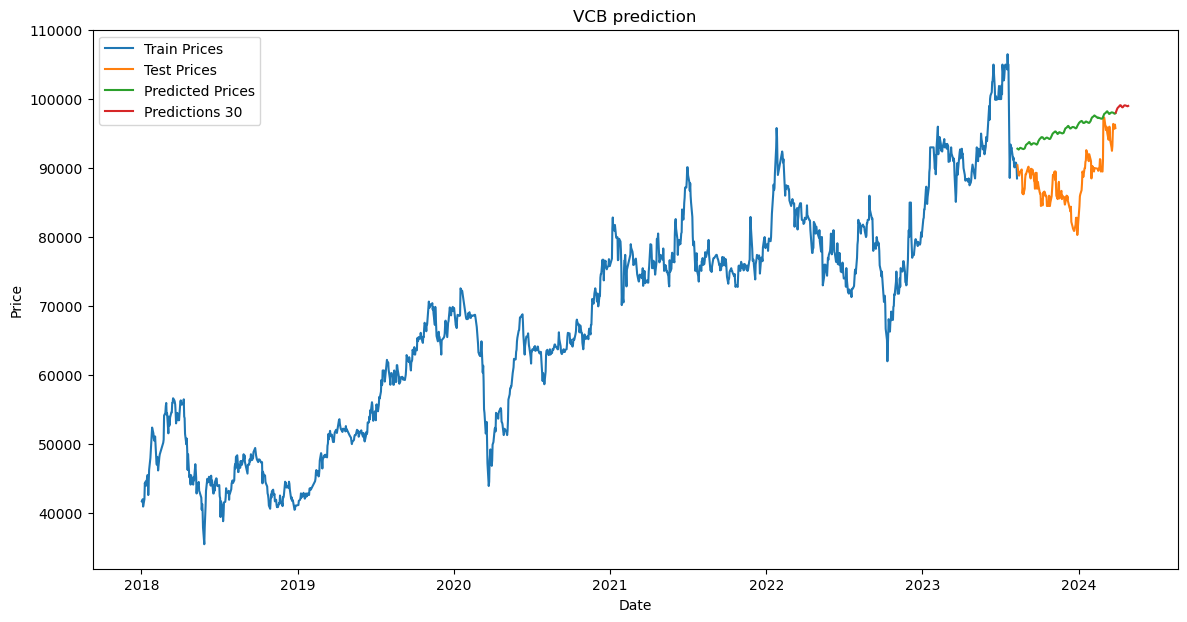

In [62]:
define_model(df,'VCB',30,0.9)

Testing RMSE:7883.085715065895
Testing MAE: 7144.16650712545
Testing MAPE: 0.08243037033641422
         Date  Predicted_Price
0  2024-03-28     98050.359925
1  2024-03-29     98211.267220
2  2024-03-30     98391.439350
3  2024-03-31     98556.320991
4  2024-04-01     98681.614704
5  2024-04-02     98765.253748
6  2024-04-03     98822.613137
7  2024-04-04     98880.774343
8  2024-04-05     98955.073587
9  2024-04-06     99037.249650
10 2024-04-07     99099.322196
11 2024-04-08     99111.188134
12 2024-04-09     99061.128065
13 2024-04-10     98966.346212
14 2024-04-11     98866.688457
15 2024-04-12     98804.997578
16 2024-04-13     98805.661766
17 2024-04-14     98863.753954
18 2024-04-15     98950.385377
19 2024-04-16     99029.976671
20 2024-04-17     99078.416829
21 2024-04-18     99091.614696
22 2024-04-19     99081.008696
23 2024-04-20     99061.257117
24 2024-04-21     99039.822483
25 2024-04-22     99015.726801
26 2024-04-23     98987.383462
27 2024-04-24     98962.403527
28 202

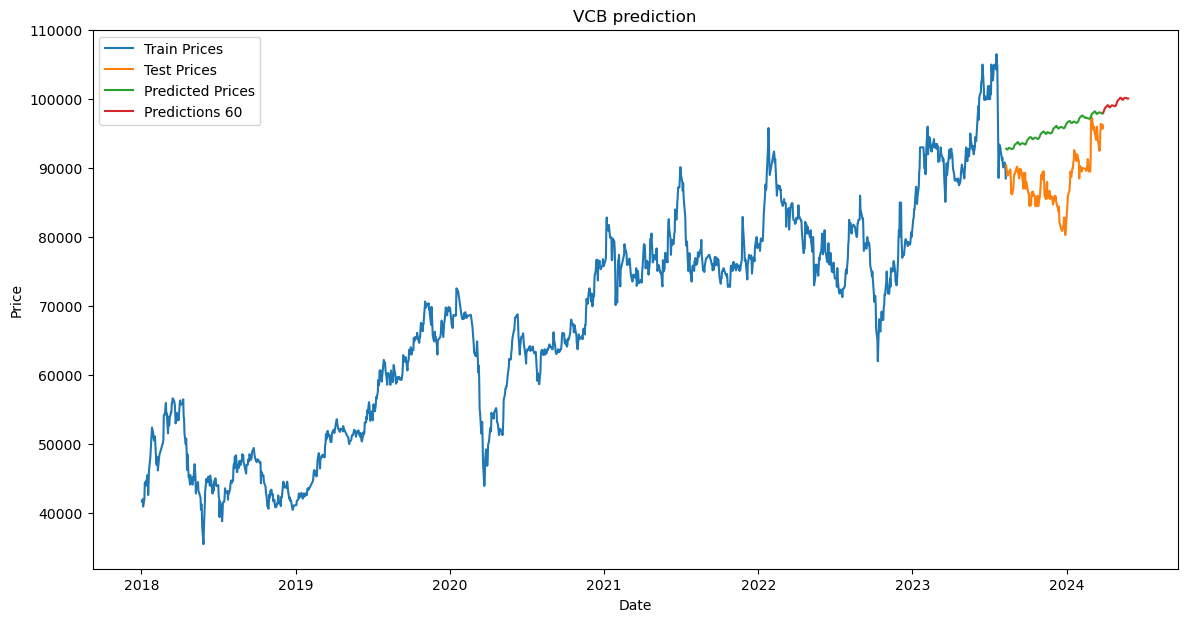

In [63]:
define_model(df,'VCB',60,0.9)

Testing RMSE:7883.085715065895
Testing MAE: 7144.16650712545
Testing MAPE: 0.08243037033641422
         Date  Predicted_Price
0  2024-03-28     98050.359925
1  2024-03-29     98211.267220
2  2024-03-30     98391.439350
3  2024-03-31     98556.320991
4  2024-04-01     98681.614704
..        ...              ...
85 2024-06-21    101227.836298
86 2024-06-22    101203.740616
87 2024-06-23    101175.397278
88 2024-06-24    101150.417343
89 2024-06-25    101148.592302

[90 rows x 2 columns]


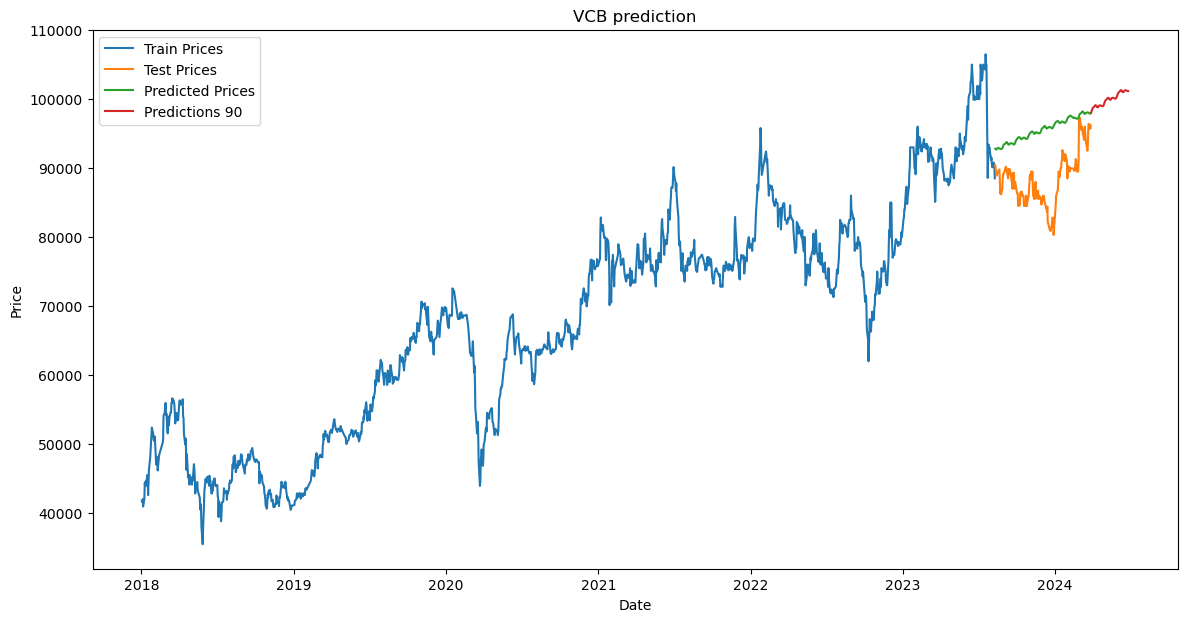

In [64]:
define_model(df,'VCB',90,0.9)

VCB 8:2

Testing RMSE:6512.3635545670395
Testing MAE: 5301.096805436912
Testing MAPE: 0.058110850992709455
         Date  Predicted_Price
0  2024-03-28     95818.170465
1  2024-03-29     95876.792376
2  2024-03-30     96003.388428
3  2024-03-31     96179.740997
4  2024-04-01     96360.788160
5  2024-04-02     96501.670238
6  2024-04-03     96571.649470
7  2024-04-04     96583.954267
8  2024-04-05     96577.714281
9  2024-04-06     96588.760998
10 2024-04-07     96623.997997
11 2024-04-08     96656.719710
12 2024-04-09     96646.209592
13 2024-04-10     96568.590560
14 2024-04-11     96438.098210
15 2024-04-12     96303.943501
16 2024-04-13     96223.855321
17 2024-04-14     96230.789785
18 2024-04-15     96314.010888
19 2024-04-16     96426.637526
20 2024-04-17     96514.754143
21 2024-04-18     96549.416310
22 2024-04-19     96541.327766
23 2024-04-20     96529.557643
24 2024-04-21     96552.707259
25 2024-04-22     96622.193663
26 2024-04-23     96715.445092
27 2024-04-24     96793.167760
28 

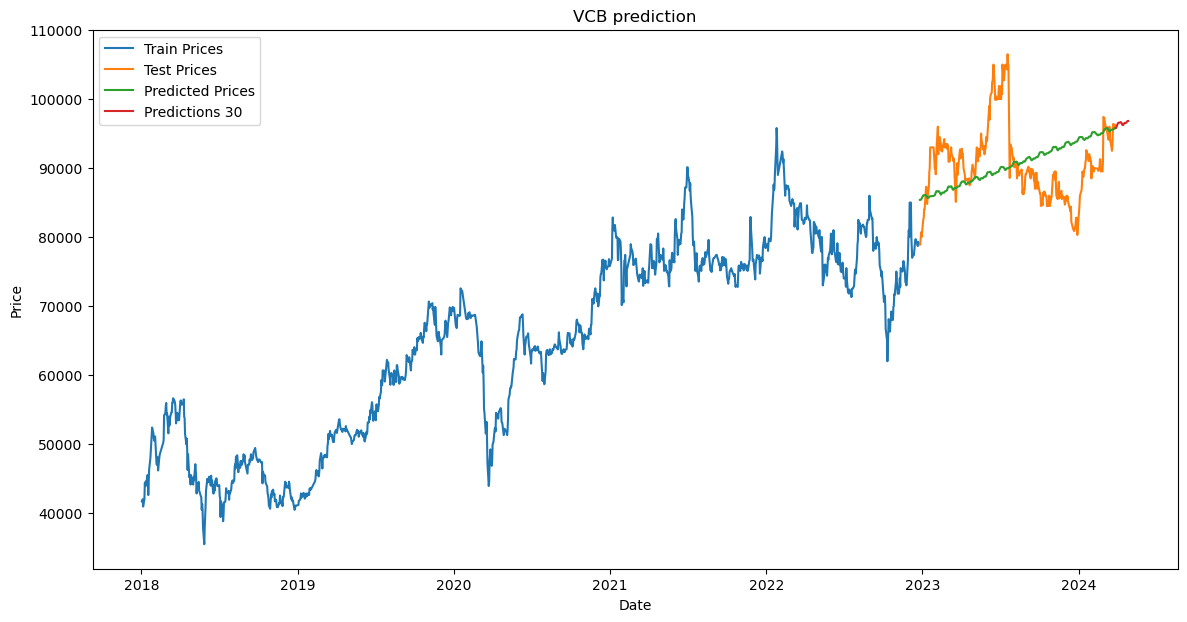

In [65]:
define_model(df,'VCB',30,0.8)

Testing RMSE:6512.3635545670395
Testing MAE: 5301.096805436912
Testing MAPE: 0.058110850992709455
         Date  Predicted_Price
0  2024-03-28     95818.170465
1  2024-03-29     95876.792376
2  2024-03-30     96003.388428
3  2024-03-31     96179.740997
4  2024-04-01     96360.788160
5  2024-04-02     96501.670238
6  2024-04-03     96571.649470
7  2024-04-04     96583.954267
8  2024-04-05     96577.714281
9  2024-04-06     96588.760998
10 2024-04-07     96623.997997
11 2024-04-08     96656.719710
12 2024-04-09     96646.209592
13 2024-04-10     96568.590560
14 2024-04-11     96438.098210
15 2024-04-12     96303.943501
16 2024-04-13     96223.855321
17 2024-04-14     96230.789785
18 2024-04-15     96314.010888
19 2024-04-16     96426.637526
20 2024-04-17     96514.754143
21 2024-04-18     96549.416310
22 2024-04-19     96541.327766
23 2024-04-20     96529.557643
24 2024-04-21     96552.707259
25 2024-04-22     96622.193663
26 2024-04-23     96715.445092
27 2024-04-24     96793.167760
28 

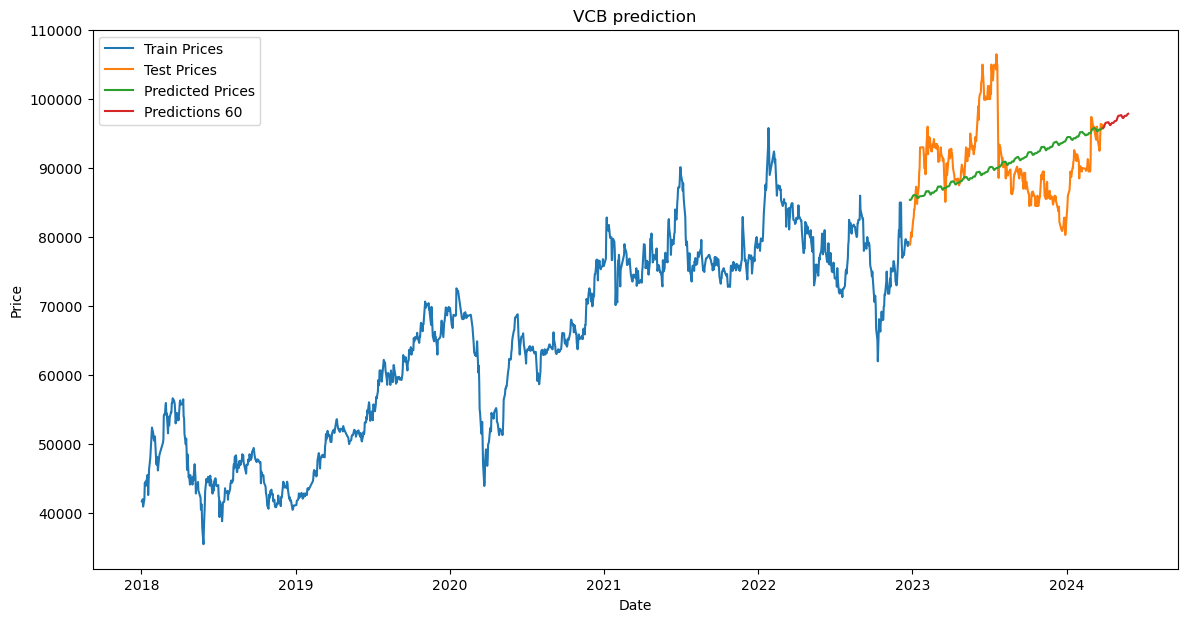

In [66]:
define_model(df,'VCB',60,0.8)

Testing RMSE:6512.3635545670395
Testing MAE: 5301.096805436912
Testing MAPE: 0.058110850992709455
         Date  Predicted_Price
0  2024-03-28     95818.170465
1  2024-03-29     95876.792376
2  2024-03-30     96003.388428
3  2024-03-31     96179.740997
4  2024-04-01     96360.788160
..        ...              ...
85 2024-06-21     98610.088144
86 2024-06-22     98679.574548
87 2024-06-23     98772.825977
88 2024-06-24     98850.548645
89 2024-06-25     98885.961082

[90 rows x 2 columns]


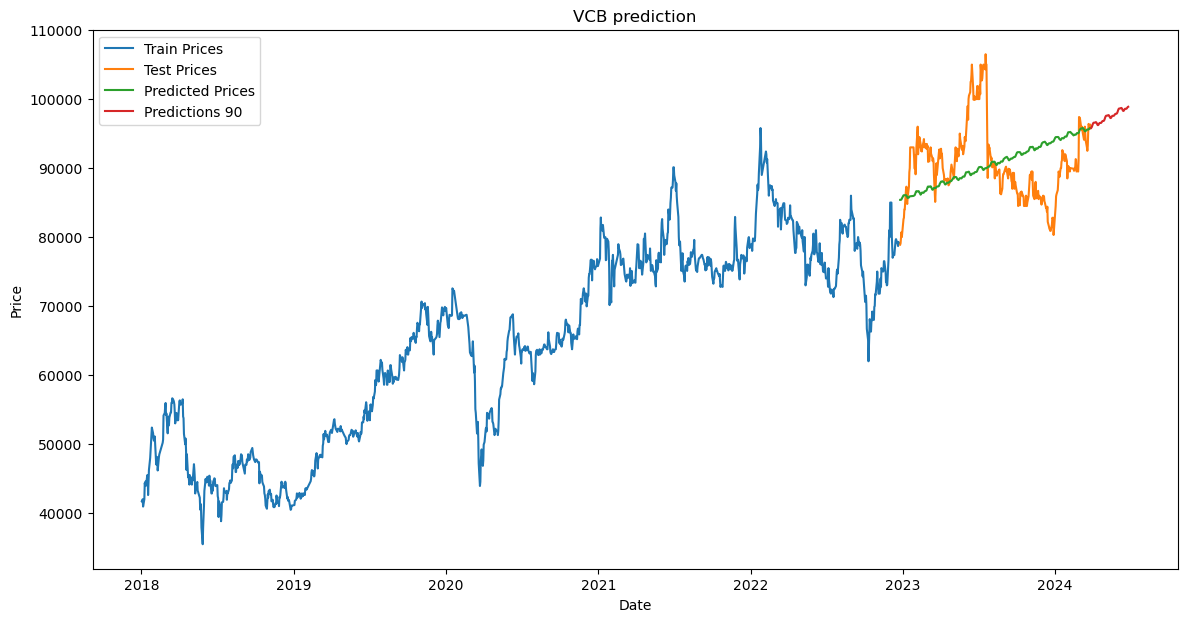

In [67]:
define_model(df,'VCB',90,0.8)

VCB 7:3

Testing RMSE:10519.872609964712
Testing MAE: 9126.21858214702
Testing MAPE: 0.11162505118439911
         Date  Predicted_Price
0  2024-03-28    102954.987950
1  2024-03-29    102986.619904
2  2024-03-30    103101.191131
3  2024-03-31    103294.722261
4  2024-04-01    103526.628353
5  2024-04-02    103740.628737
6  2024-04-03    103874.072736
7  2024-04-04    103910.515079
8  2024-04-05    103881.074906
9  2024-04-06    103844.020982
10 2024-04-07    103848.583658
11 2024-04-08    103905.090308
12 2024-04-09    103979.806264
13 2024-04-10    104017.570799
14 2024-04-11    103978.061495
15 2024-04-12    103863.190002
16 2024-04-13    103718.905035
17 2024-04-14    103610.733750
18 2024-04-15    103588.445932
19 2024-04-16    103661.203671
20 2024-04-17    103797.048358
21 2024-04-18    103944.860828
22 2024-04-19    104063.358493
23 2024-04-20    104138.833505
24 2024-04-21    104182.449700
25 2024-04-22    104212.354326
26 2024-04-23    104235.697965
27 2024-04-24    104244.404679
28 20

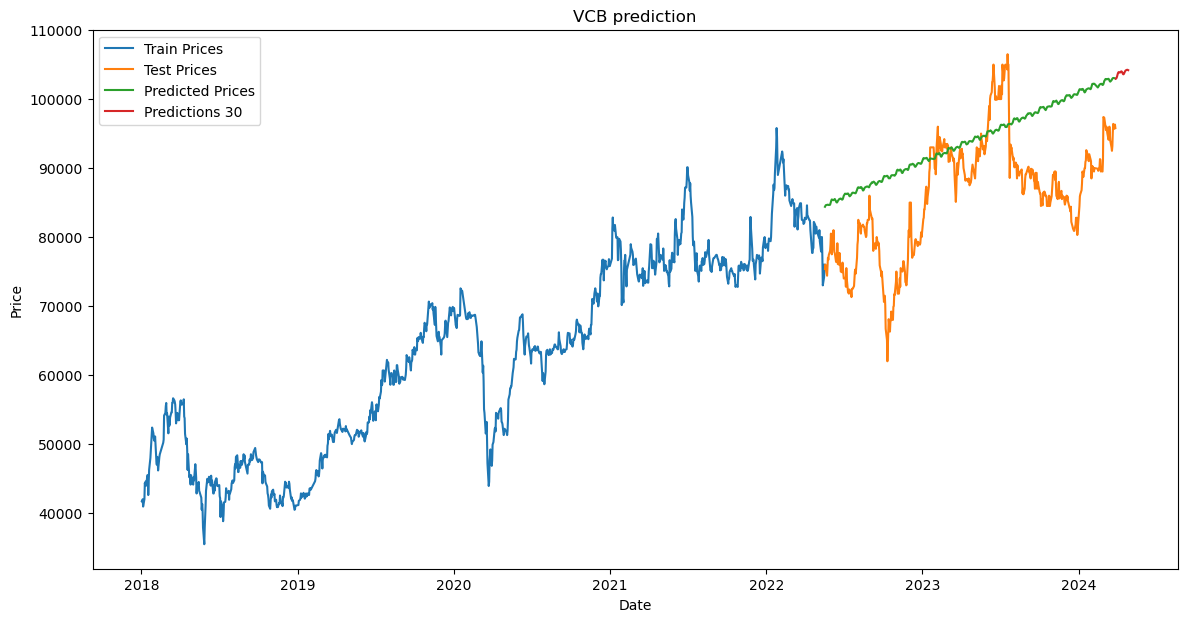

In [68]:
define_model(df,'VCB',30,0.7)

Testing RMSE:10519.872609964712
Testing MAE: 9126.21858214702
Testing MAPE: 0.11162505118439911
         Date  Predicted_Price
0  2024-03-28    102954.987950
1  2024-03-29    102986.619904
2  2024-03-30    103101.191131
3  2024-03-31    103294.722261
4  2024-04-01    103526.628353
5  2024-04-02    103740.628737
6  2024-04-03    103874.072736
7  2024-04-04    103910.515079
8  2024-04-05    103881.074906
9  2024-04-06    103844.020982
10 2024-04-07    103848.583658
11 2024-04-08    103905.090308
12 2024-04-09    103979.806264
13 2024-04-10    104017.570799
14 2024-04-11    103978.061495
15 2024-04-12    103863.190002
16 2024-04-13    103718.905035
17 2024-04-14    103610.733750
18 2024-04-15    103588.445932
19 2024-04-16    103661.203671
20 2024-04-17    103797.048358
21 2024-04-18    103944.860828
22 2024-04-19    104063.358493
23 2024-04-20    104138.833505
24 2024-04-21    104182.449700
25 2024-04-22    104212.354326
26 2024-04-23    104235.697965
27 2024-04-24    104244.404679
28 20

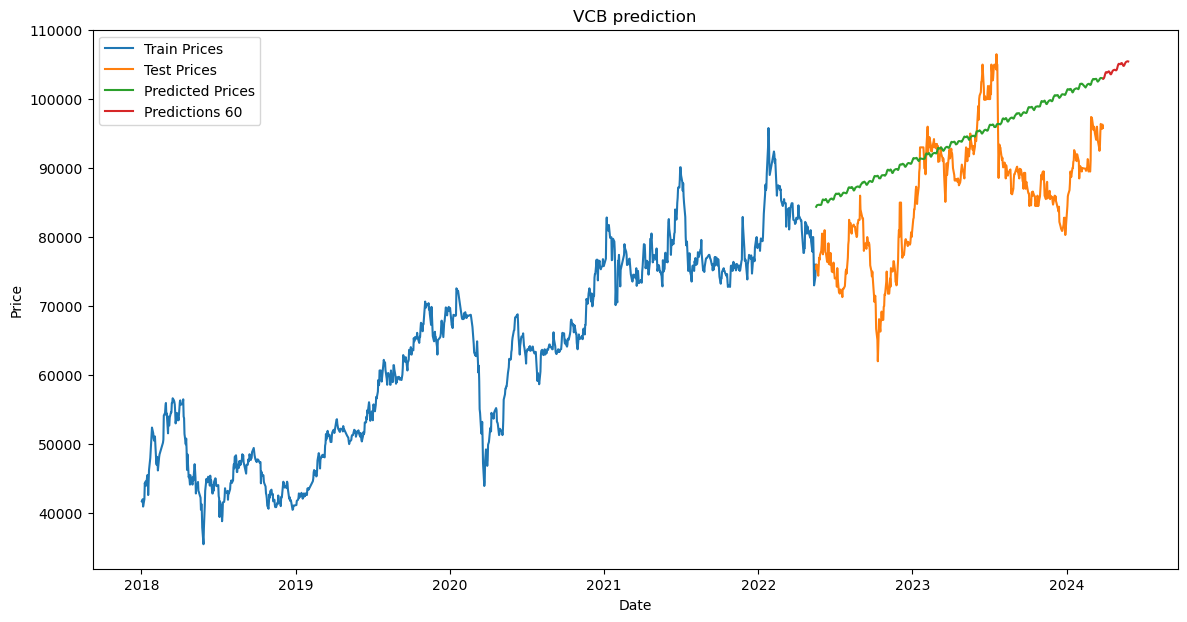

In [69]:
define_model(df,'VCB',60,0.7)

Testing RMSE:10519.872609964712
Testing MAE: 9126.21858214702
Testing MAPE: 0.11162505118439911
         Date  Predicted_Price
0  2024-03-28    102954.987950
1  2024-03-29    102986.619904
2  2024-03-30    103101.191131
3  2024-03-31    103294.722261
4  2024-04-01    103526.628353
..        ...              ...
85 2024-06-21    106619.555045
86 2024-06-22    106649.459672
87 2024-06-23    106672.803310
88 2024-06-24    106681.510024
89 2024-06-25    106664.544784

[90 rows x 2 columns]


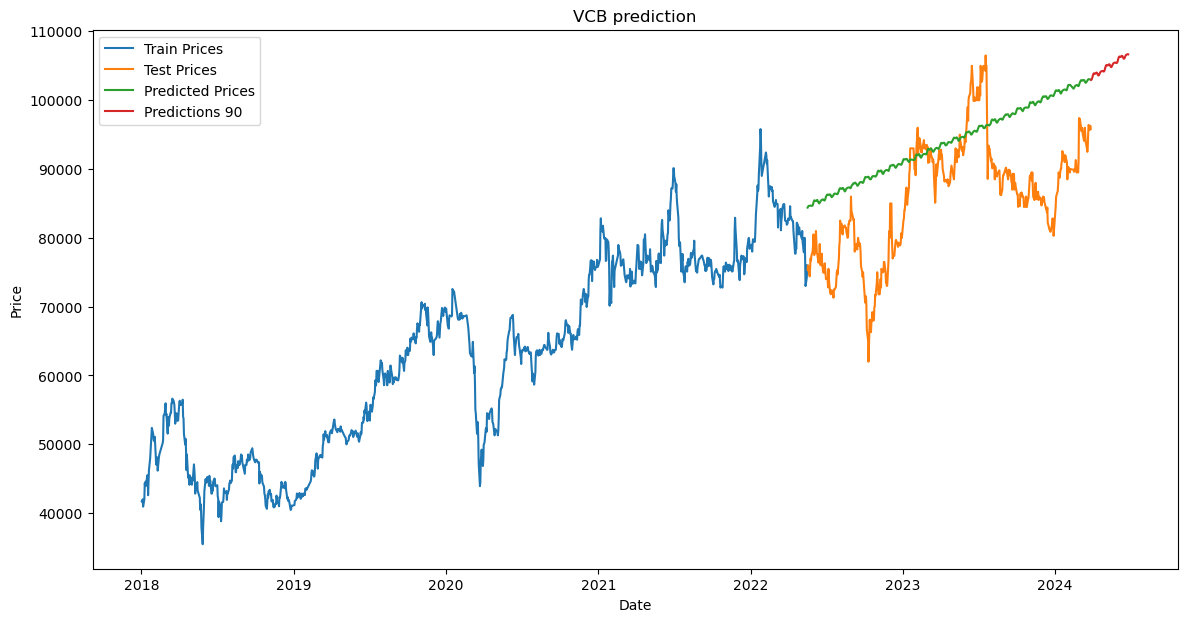

In [70]:
define_model(df,'VCB',90,0.7)